# World Population Data
This dataset has the total population numbers for every country from 1960 to 2020. Additionally, there is a table that contains country information, including region, income group, and any special notes.

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import statsmodels.formula.api as smf

sns.set_context('talk')

population = pd.read_csv("world_pop_data.csv")

In [26]:
meta = pd.read_csv('metadata_country.csv')

[Source](https://data.worldbank.org/indicator/SP.POP.TOTL?end=2020&start=1960&view=chart) and [license](https://datacatalog.worldbank.org/public-licenses#cc-by) of dataset.

# Working:

- 🗺️ **Explore**: Which countries have experienced the highest population growth?
- 📊 **Visualize**: Create a plot that visualizes the population growth of countries over time grouped by region.
- 🔎 **Analyze**: How does income group affect a country's population growth? 

Deeply analyze the population growth over the time in each region

In [27]:
population_simple = population[['Country Code'] + list(population.loc[:, '1960' : '2020'])]
population.iloc[:10]

,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,1966,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,ABW,"Population, total",SP.POP.TOTL,54208.0,55434.0,56234.0,56699.0,57029.0,57357.0,57702.0,...,102050.0,102565.0,103165.0,103776.0,104339.0,104865.0,105361.0,105846.0,106310.0,106766.0
1,AFE,"Population, total",SP.POP.TOTL,130836765.0,134159786.0,137614644.0,141202036.0,144920186.0,148769974.0,152752671.0,...,532760424.0,547482863.0,562601578.0,578075373.0,593871847.0,609978946.0,626392880.0,643090131.0,660046272.0,677243299.0
2,AFG,"Population, total",SP.POP.TOTL,8996967.0,9169406.0,9351442.0,9543200.0,9744772.0,9956318.0,10174840.0,...,30117411.0,31161378.0,32269592.0,33370804.0,34413603.0,35383028.0,36296111.0,37171922.0,38041757.0,38928341.0
3,AFW,"Population, total",SP.POP.TOTL,96396419.0,98407221.0,100506960.0,102691339.0,104953470.0,107289875.0,109701811.0,...,360285439.0,370243017.0,380437896.0,390882979.0,401586651.0,412551299.0,423769930.0,435229381.0,446911598.0,458803476.0
4,AGO,"Population, total",SP.POP.TOTL,5454938.0,5531451.0,5608499.0,5679409.0,5734995.0,5770573.0,5781305.0,...,24220660.0,25107925.0,26015786.0,26941773.0,27884380.0,28842482.0,29816769.0,30809787.0,31825299.0,32866268.0
5,ALB,"Population, total",SP.POP.TOTL,1608800.0,1659800.0,1711319.0,1762621.0,1814135.0,1864791.0,1914573.0,...,2905195.0,2900401.0,2895092.0,2889104.0,2880703.0,2876101.0,2873457.0,2866376.0,2854191.0,2837743.0
6,AND,"Population, total",SP.POP.TOTL,13410.0,14378.0,15379.0,16407.0,17466.0,18542.0,19646.0,...,83748.0,82427.0,80770.0,79213.0,77993.0,77295.0,76997.0,77008.0,77146.0,77265.0
7,ARB,"Population, total",SP.POP.TOTL,92197715.0,94724540.0,97334438.0,100034191.0,102832792.0,105736428.0,108758634.0,...,363156846.0,371437642.0,379696477.0,387899835.0,396028301.0,404042892.0,411942825.0,419851989.0,427870273.0,436080728.0
8,ARE,"Population, total",SP.POP.TOTL,92417.0,100801.0,112112.0,125130.0,138049.0,149855.0,159979.0,...,8946778.0,9141598.0,9197908.0,9214182.0,9262896.0,9360975.0,9487206.0,9630966.0,9770526.0,9890400.0
9,ARG,"Population, total",SP.POP.TOTL,20481781.0,20817270.0,21153042.0,21488916.0,21824427.0,22159644.0,22494031.0,...,41261490.0,41733271.0,42202935.0,42669500.0,43131966.0,43590368.0,44044811.0,44494502.0,44938712.0,45376763.0


## Manipulation and Visualization of Top five countries by population growth Rate (1960 - 2020)

**Population Growth:** Let's calulculate the Top Five Most Countries by population Growth Rate in the world.

In [28]:
def sort_columns(table_name, column_names : list, ascending=True):
    return table_name.sort_values(by=column_names, ascending=ascending)

pop_table = pd.melt(population_simple, id_vars=['Country Code'], var_name='Date', value_name='Population', ignore_index=False)
pop_table_sorted = sort_columns(pop_table, ['Country Code' , 'Date']).set_index('Country Code').fillna(method='ffill').fillna(0)

**Top Five Coutries by Growth Rate (2019 - 2020):** The following five countries' names listed in descending order who have highest population growth rate from 2019 to 2020.

In [29]:
# code to check the population from 1960 to 2020 to ensure the max initially although the population growth of each country should be max at 2020
def cal_growth(column):
    return ((column[-1] - column[-2]) / column[-2]) * 100

growth_rate =  pop_table_sorted.groupby('Country Code')[['Population']].agg(cal_growth).rename(columns={'Population' : 'Population Rate'})
top_growth_rate_sorted = sort_columns(growth_rate, 'Population Rate', ascending=False).iloc[: 5]
print(top_growth_rate_sorted)

              Population Rate
Country Code                 
MLT                  4.210395
NER                  3.843369
BHR                  3.681472
GNQ                  3.466344
UGA                  3.323756


In [30]:
pop_table_sorted_meta_merged = pop_table_sorted.merge(meta, on='Country Code')

**Visualzation:** The visualization of top five countries by Growth Rate is below displayed according to the region:

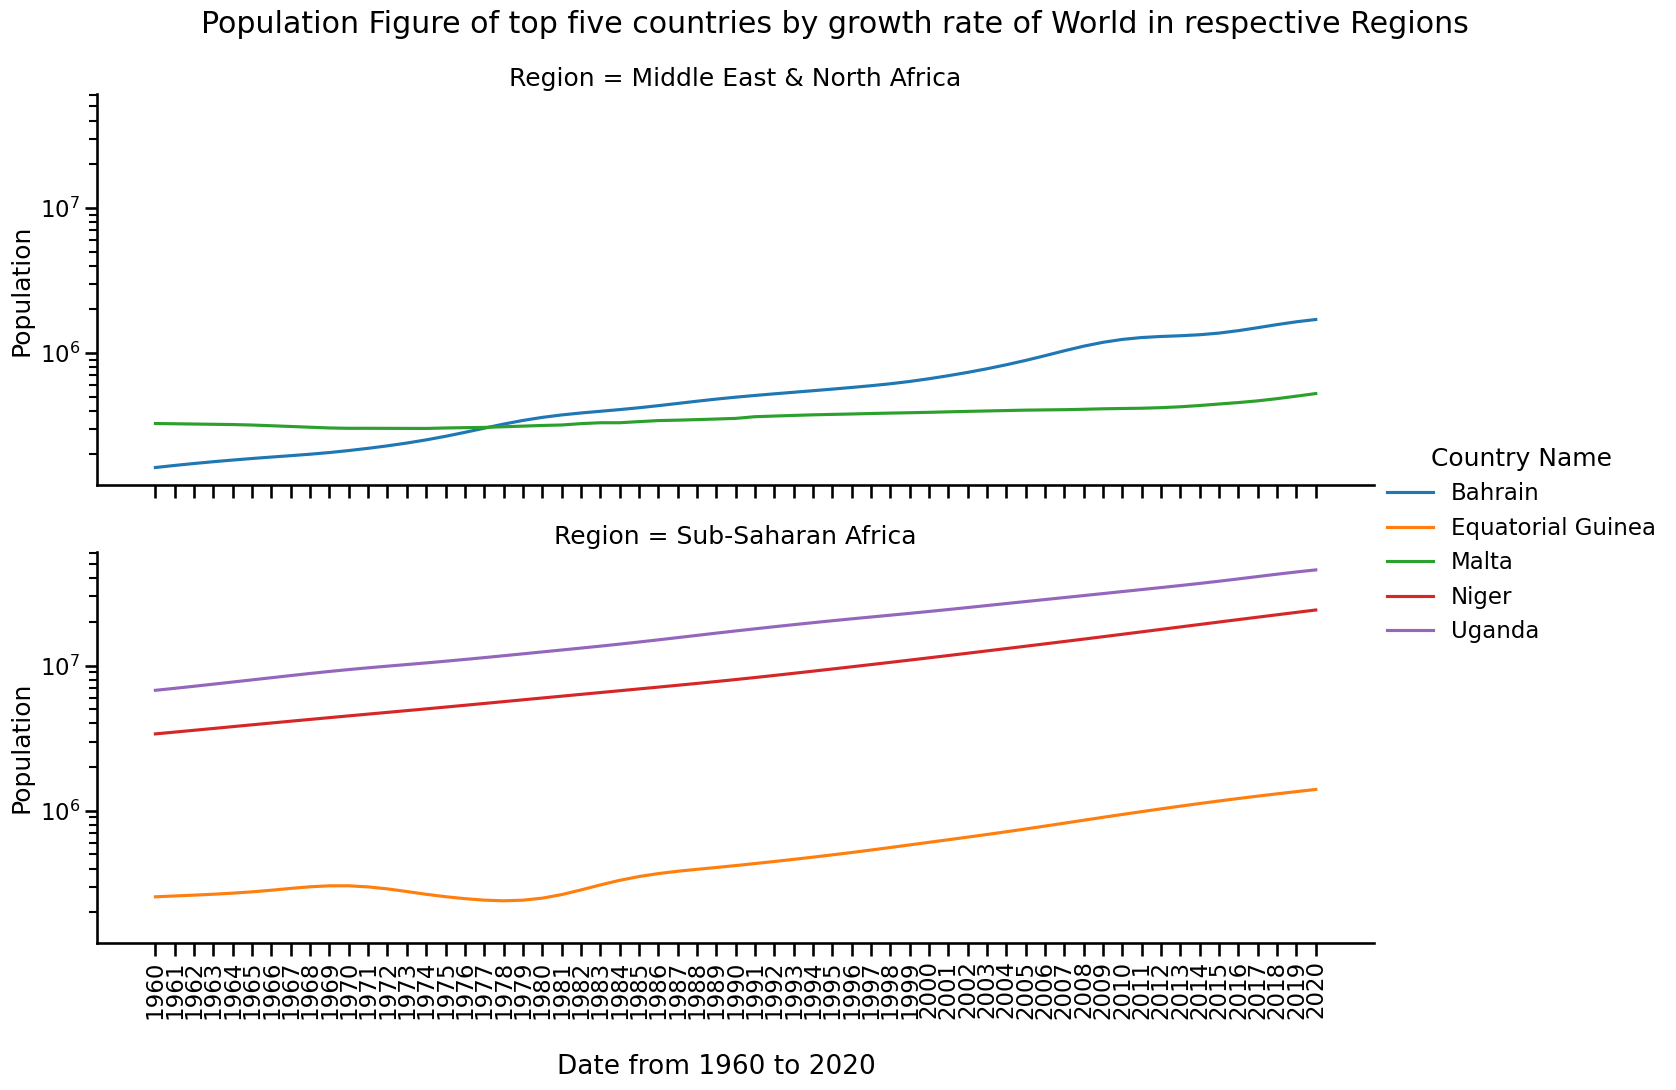

In [31]:
countries_top_pop_by_region = pop_table_sorted_meta_merged[pop_table_sorted_meta_merged['Country Code'].isin(top_growth_rate_sorted.index)].rename(columns={'TableName' : 'Country Name'})
f = sns.relplot(y='Population', x='Date', data=countries_top_pop_by_region, kind='line', hue='Country Name', col='Region', col_wrap=1 , aspect=2.8)
plt.yscale('log')
f.set_xticklabels(rotation = 90)
f.fig.supxlabel('Date from 1960 to 2020', y=-0.04, x=0.43, fontsize=19)
f.set_xlabels('')
f.fig.suptitle('Population Figure of top five countries by growth rate of World in respective Regions', y=1.03)
countries_top_pop_by_region
plt.show()

It seems that the highest population growth rate countries are those who have lower and lower-middle income, lets take a look at relation of Population rate with income group to have a idea.

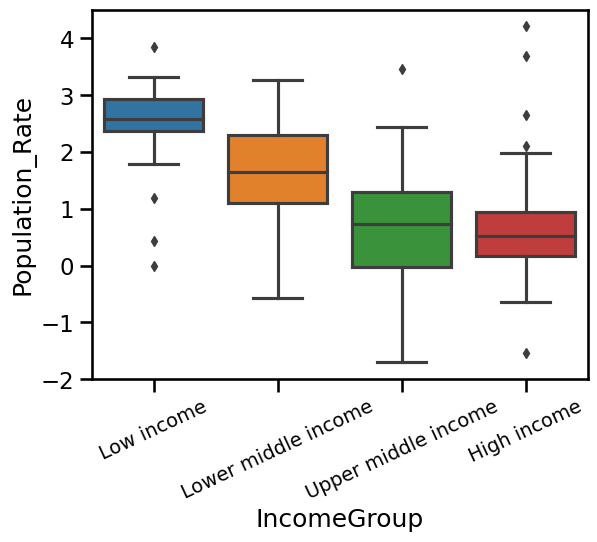

In [32]:
growth_rate_income = pop_table_sorted_meta_merged.merge(growth_rate, on='Country Code')
growth_rate_income_model = growth_rate_income[['Country Code', 'IncomeGroup' , 'Population Rate']].set_index('Country Code').drop_duplicates().dropna().rename(columns={'Population Rate' : 'Population_Rate'})
fig = sns.boxplot(x='IncomeGroup', y='Population_Rate', data=growth_rate_income_model, order=['Low income' , 'Lower middle income' , 'Upper middle income' , 'High income'])
plt.xticks(rotation=25, fontsize=14)
plt.show()
fig.set(ylabel='Population Rate', xlabel ='Income Group')
plt.clf()

**Population vs Income Group:** The upper box plot shows that at average the High income have low Population rate, as well as outliers of countries' population. But in general the box plot tells that at most cases the higher the income , the lower the population rate. The outliers in this case are exceptional. The inter quantile range of the income categories tell us that the most high income countries have lower population rate. The downward outliers in low income show less population due to extreme low income, while the upward outliers in High income show of the countries where people have higher income at genral and they are fond of growing population. But generally, this is exception, not a rule. 

## The population Rate coverage by each Region (1960 - 2020)

**Visualization of Population rate (1960 - 2020):** Let's Visualize the population rate of each region from 1960 - 2020.

<Figure size 640x480 with 0 Axes>

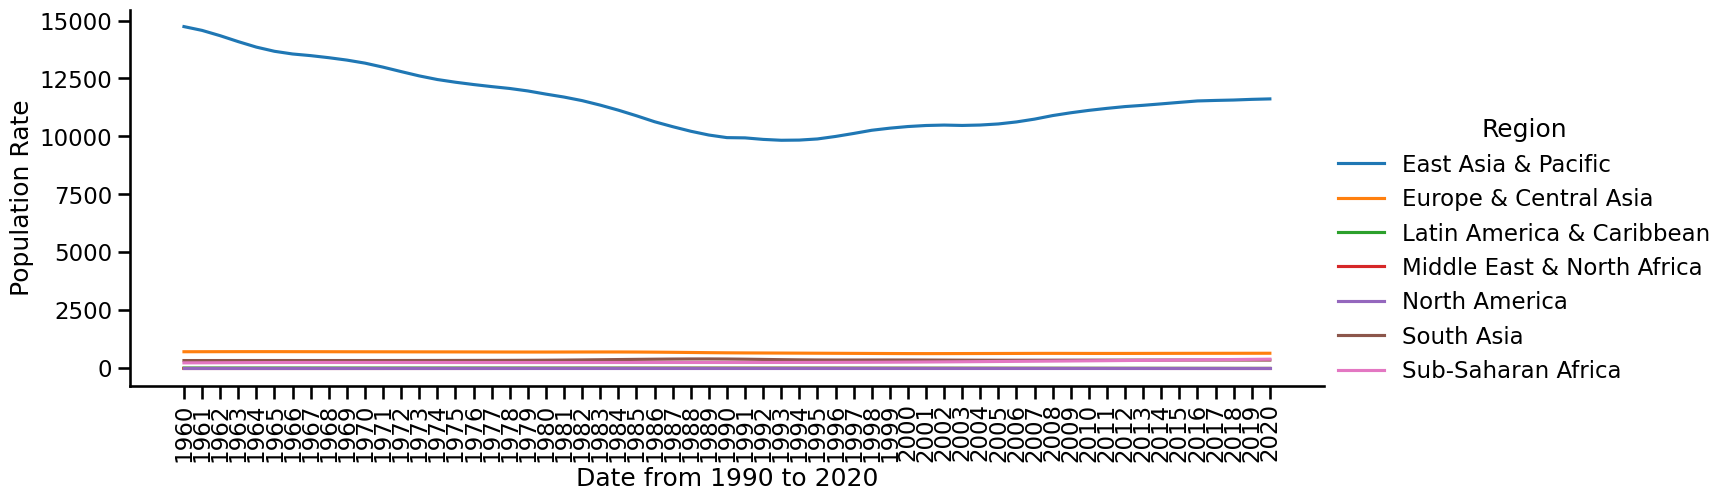

In [33]:
def cal_growth_rate_mean(column):
    column = list(column)
    rate = column[0]
    growth = [0]
    for index, value in enumerate(column):
        if (index != 0):
            rate = ((value - column[index-1]) / column[index-1]) * 100
            growth.append(rate)
    return np.mean(growth)

table =  pop_table_sorted_meta_merged.dropna().groupby(['Region', 'Date'], as_index=False)[['Population']].agg(cal_growth_rate_mean).rename(columns={'Population' : 'Population Rate'})
fig = sns.relplot(x='Date', y='Population Rate', data=table, hue='Region', kind='line', aspect=2.8)
plt.yscale('linear')
plt.xticks(rotation=90)
plt.xlabel('Date from 1990 to 2020')
plt.show()

**Teriible:** Oh It seems that the East Asia and Pacific region has the such highest popualtion growth over the time that we cannnot conclude the insights of other regions. Lets visualize by removing the East Asia and Pacific.

Although the population growth decreased from 1960 to 1990, but after that it managed to somehow increase the population growth.

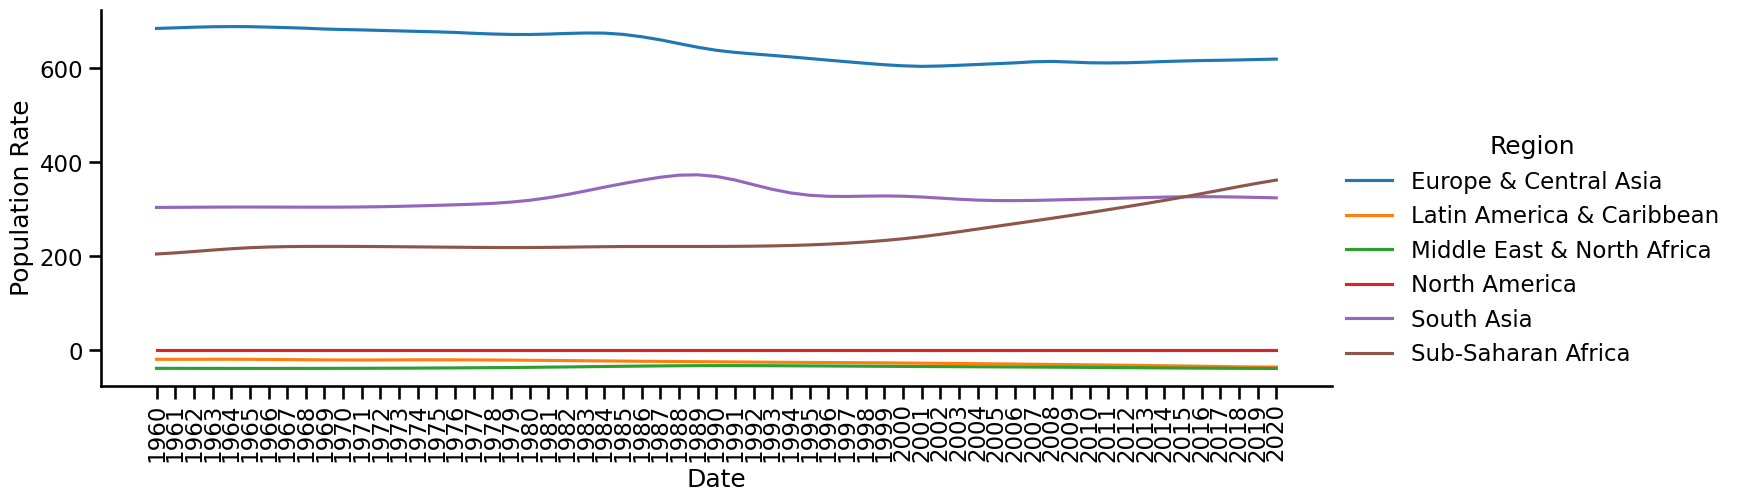

In [34]:
table_outside_asia = table[table['Region'] != 'East Asia & Pacific']
fig = sns.relplot(x='Date', y='Population Rate', data=table_outside_asia, hue='Region', kind='line', aspect=2.8)
fig.set_xticklabels(rotation=90)
plt.show()

## Warning!!
 The visualization of the other regions tells nothing special except the three ones. North America, Middle East & North Africa, Latin America and Central Asia. These three regions'countries are warned to increase their population growth rate, except Malta and Bahrain from Middle East and North Africa, who have higher growth Rate and managed to increase their population Rate. If these regions want man power and population growth upon their own country men, not from outsiders, they must find ways to increase population growth. 

## The finally Markdown on East Asia and Pacific

The East Asia and Pacific region, which has highest growth rate over the period of time, must have the higher or middle income coutries at most. We can verify the results

In [35]:
table = growth_rate_income.drop_duplicates('Country Code')
table.value_counts(['Region' , 'IncomeGroup'])

Region                      IncomeGroup        
Europe & Central Asia       High income            37
Sub-Saharan Africa          Low income             23
Latin America & Caribbean   Upper middle income    19
Sub-Saharan Africa          Lower middle income    18
Europe & Central Asia       Upper middle income    17
Latin America & Caribbean   High income            16
East Asia & Pacific         High income            14
                            Lower middle income    14
                            Upper middle income     8
Middle East & North Africa  High income             8
                            Lower middle income     7
South Asia                  Lower middle income     6
Sub-Saharan Africa          Upper middle income     6
Latin America & Caribbean   Lower middle income     6
Middle East & North Africa  Upper middle income     4
Europe & Central Asia       Lower middle income     4
North America               High income             3
Middle East & North Africa  Low in

**Verification:** The East Asia and Pacific region has the most countries. It managed to upgrade the the population growth rate due to more than 50 % of 14 lower middle income countries. So, the credits goes to these 14 lower middle countries group.

In [36]:
growth_rate_income = growth_rate_income.drop_duplicates('Country Code')
growth_rate_income_by_region = growth_rate_income.groupby(['Region', 'Country Code', 'IncomeGroup'], as_index=False)[['Population Rate']].mean()
growth_rate_income_by_region_sorted = growth_rate_income_by_region.sort_values('Population Rate', ascending=False).reset_index(drop=True)
growth_rate_income_by_region_sorted_by_east_asia = growth_rate_income_by_region_sorted[growth_rate_income_by_region_sorted['Region'] == 'East Asia & Pacific']
growth_rate_income_by_region_sorted_by_east_asia

,Region,Country Code,IncomeGroup,Population Rate
29,East Asia & Pacific,SLB,Lower middle income,2.546501
36,East Asia & Pacific,VUT,Lower middle income,2.423620
45,East Asia & Pacific,NZL,High income,2.108730
51,East Asia & Pacific,TLS,Lower middle income,1.958210
52,East Asia & Pacific,PNG,Lower middle income,1.947421
65,East Asia & Pacific,MNG,Lower middle income,1.647233
70,East Asia & Pacific,KIR,Lower middle income,1.562819
77,East Asia & Pacific,LAO,Lower middle income,1.479889
79,East Asia & Pacific,KHM,Lower middle income,1.409810
81,East Asia & Pacific,MAC,High income,1.389032


**Verification More:** Hurray! It's glad to know that the most mainting the growth rate countries in East Asia & Pacific belong to lower middle Income. 

Note: The population Growth is as per 2020.

Hope you like the Presentation.